In [121]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA as mlabPCA
import seaborn as sns
import math
import scipy.stats as stats
import statsmodels.formula.api as smf
import calendar
import time
import glob
import gc
import os
import warnings
import locale
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn import linear_model
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## DS_2_4_2 DATA CLEANUP AND EXPLORATION

In [2]:
#These are already included in data text file. Just added here for reference.
my_cols = [
            'City',
            'Pop',
            'Violent_cr',
            'Mrdr_manslter',
            'Rape1',
            'Rape2',
            'Robbery',
            'Agg_asslt',
            'Prop_cr',
            'Burg',
            'Larc_thft',
            'Mtr_vhcl_thft',
            'Arson3'
            ]


In [3]:

from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'English_United States.1252'

In [4]:
df = pd.read_csv("crime_data_ny_2013.txt",encoding="utf-8", thousands=',')
df.head()


,City,Pop,Violent_cr,Mrdr_manslter,Rape1,Rape2,Robbery,Agg_asslt,Prop_cr,Burg,Larc_thft,Mtr_vhcl_thft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
City             348 non-null object
Pop              348 non-null int64
Violent_cr       348 non-null int64
Mrdr_manslter    348 non-null int64
Rape1            0 non-null float64
Rape2            348 non-null int64
Robbery          348 non-null int64
Agg_asslt        348 non-null int64
Prop_cr          348 non-null int64
Burg             348 non-null int64
Larc_thft        348 non-null int64
Mtr_vhcl_thft    348 non-null int64
Arson3           187 non-null float64
dtypes: float64(2), int64(10), object(1)
memory usage: 35.4+ KB


In [6]:
df.replace('', np.nan, inplace=True)

In [7]:
df.isnull().sum()

City               0
Pop                0
Violent_cr         0
Mrdr_manslter      0
Rape1            348
Rape2              0
Robbery            0
Agg_asslt          0
Prop_cr            0
Burg               0
Larc_thft          0
Mtr_vhcl_thft      0
Arson3           161
dtype: int64

In [8]:
df.fillna(0,inplace=True)
df.isnull().sum()

City             0
Pop              0
Violent_cr       0
Mrdr_manslter    0
Rape1            0
Rape2            0
Robbery          0
Agg_asslt        0
Prop_cr          0
Burg             0
Larc_thft        0
Mtr_vhcl_thft    0
Arson3           0
dtype: int64

In [9]:
df = df.astype({            
                'City':'object',
                'Pop':'int64',
                'Violent_cr':'int64',
                'Mrdr_manslter':'int64',
                'Rape1':'int64',
                'Rape2':'int64',
                'Robbery':'int64',
                'Agg_asslt':'int64',
                'Prop_cr':'int64',
                'Burg':'int64',
                'Larc_thft':'int64',
                'Mtr_vhcl_thft':'int64',
                'Arson3':'int64'
                })

In [10]:
df["Pop_squared"] = np.square(df["Pop"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 14 columns):
City             348 non-null object
Pop              348 non-null int64
Violent_cr       348 non-null int64
Mrdr_manslter    348 non-null int64
Rape1            348 non-null int64
Rape2            348 non-null int64
Robbery          348 non-null int64
Agg_asslt        348 non-null int64
Prop_cr          348 non-null int64
Burg             348 non-null int64
Larc_thft        348 non-null int64
Mtr_vhcl_thft    348 non-null int64
Arson3           348 non-null int64
Pop_squared      348 non-null int64
dtypes: int64(13), object(1)
memory usage: 38.1+ KB


In [11]:
df.describe()

,Pop,Violent_cr,Mrdr_manslter,Rape1,Rape2,Robbery,Agg_asslt,Prop_cr,Burg,Larc_thft,Mtr_vhcl_thft,Arson3,Pop_squared
count,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000
mean,40037.632,201.595,1.566,0.000,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.006,203554650960.236
std,450037.368,2815.269,18.304,0.000,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,7.885,3778875542708.130
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000
25%,3003.000,2.000,0.000,0.000,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000,9018117.000
50%,7233.500,6.000,0.000,0.000,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000,52325684.500
75%,18427.500,22.000,0.000,0.000,2.000,5.000,14.000,341.000,51.250,287.250,7.000,0.000,339753567.000
max,8396126.000,52384.000,335.000,0.000,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000,70494931807876.000


In [12]:
print("Percent of Zeros\n================================")
print("Violent_cr {:0.2f}".format(df[(df['Violent_cr']==0)].shape[0]/df.shape[0]))
print("Mrdr_manslter {:0.2f}".format(df[(df['Mrdr_manslter']==0)].shape[0]/df.shape[0]))
print("Rape2 {:0.2f}".format(df[(df['Rape2']==0)].shape[0]/df.shape[0]))
print("Robbery {:0.2f}".format(df[(df['Robbery']==0)].shape[0]/df.shape[0]))
print("Agg_asslt {:0.2f}".format(df[(df['Agg_asslt']==0)].shape[0]/df.shape[0]))
print("Prop_cr {:0.2f}".format(df[(df['Prop_cr']==0)].shape[0]/df.shape[0]))
print("Burg {:0.2f}".format(df[(df['Burg']==0)].shape[0]/df.shape[0]))
print("Larc_thft {:0.2f}".format(df[(df['Larc_thft']==0)].shape[0]/df.shape[0]))
print("Mtr_vhcl_thft {:0.2f}".format(df[(df['Mtr_vhcl_thft']==0)].shape[0]/df.shape[0]))
print("Arson3 {:0.2f}".format(df[(df['Arson3']==0)].shape[0]/df.shape[0]))


Percent of Zeros
Violent_cr 0.15
Mrdr_manslter 0.86
Rape2 0.59
Robbery 0.40
Agg_asslt 0.19
Prop_cr 0.02
Burg 0.06
Larc_thft 0.02
Mtr_vhcl_thft 0.27
Arson3 0.84


# Select data to play with

In [13]:
df2 = df.loc[((df["City"] != "")), [
                                    "City",
                                    "Pop",
                                    "Pop_squared",   
                                    "Violent_cr",
                                    "Mrdr_manslter",
                                    "Rape2", 
                                    "Robbery",
                                    "Agg_asslt",
                                    "Burg",
                                    "Larc_thft",
                                    "Mtr_vhcl_thft", 
                                    "Prop_cr"
                                    ]]
df_jittered2 = df2
df_jittered2.shape[0]


348

# Clean population variable

In [14]:
#df_jittered2["Pop"].dropna().sample(90).describe()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


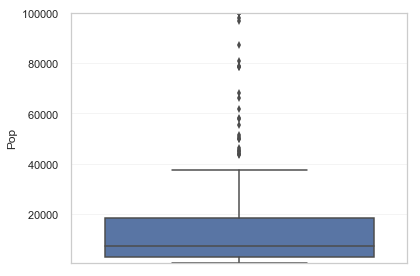

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,City,Pop,Pop_squared,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr
0,Adams Village,1861,3463321,0,0,0,0,0,2,10,0,12
1,Addison Town and Village,2577,6640929,3,0,0,0,3,3,20,1,24
2,Akron Village,2846,8099716,3,0,0,0,3,1,15,0,16
3,Albany,97956,9595377936,791,8,30,227,526,705,3243,142,4090
4,Albion Village,6388,40806544,23,0,3,4,16,53,165,5,223
5,Alfred Village,4089,16719921,5,0,0,3,2,10,36,0,46
6,Allegany Village,1781,3171961,3,0,0,0,3,0,10,0,10
7,Amherst Town,100000,13993943616,107,1,7,31,68,204,1882,32,2118
8,Amityville Village,9519,90611361,9,0,2,4,3,16,188,6,210
9,Amsterdam,18182,330585124,30,0,0,12,18,99,291,15,405


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


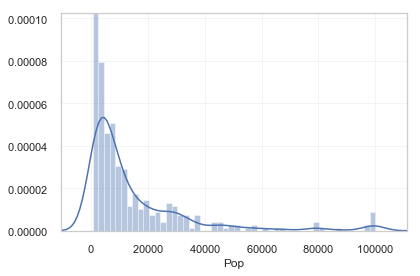

In [15]:
df_jittered2.head(10)
df_jittered2['Pop'] = df.apply(lambda x: 100000 if x['Pop'] > 100000 else x['Pop'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Pop"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Pop"],bins=50)
df_jittered2.head(10)

# Clean population squared variable

In [16]:
df_jittered2["Pop_squared"].dropna().sample(90).describe()

count           90.000
mean     467899394.022
std     1202554119.570
min         430336.000
25%        6430595.250
50%       45910010.000
75%      261727687.000
max     7604537616.000
Name: Pop_squared, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


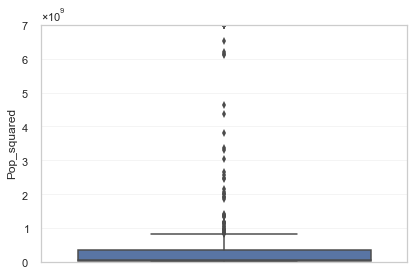

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


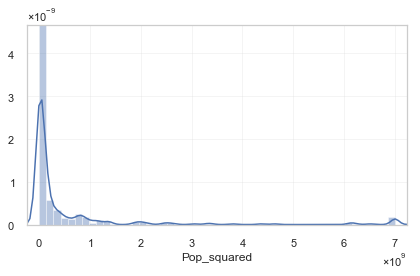

In [17]:
df_jittered2['Pop_squared'] = df.apply(lambda x:  7000000000 if x['Pop_squared'] >  7000000000 else x['Pop_squared'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Pop_squared"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Pop_squared"],bins=50)

# Clean violent crime variable

In [18]:
#df_jittered2["Violent_cr"].dropna().sample(90).describe()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


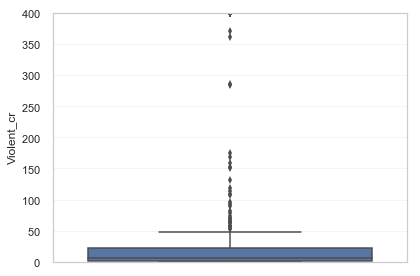

,City,Pop,Pop_squared,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr
0,Adams Village,1861,3463321,0,0,0,0,0,2,10,0,12
1,Addison Town and Village,2577,6640929,3,0,0,0,3,3,20,1,24
2,Akron Village,2846,8099716,3,0,0,0,3,1,15,0,16
3,Albany,97956,7000000000,400,8,30,227,526,705,3243,142,4090
4,Albion Village,6388,40806544,23,0,3,4,16,53,165,5,223
5,Alfred Village,4089,16719921,5,0,0,3,2,10,36,0,46
6,Allegany Village,1781,3171961,3,0,0,0,3,0,10,0,10
7,Amherst Town,100000,7000000000,107,1,7,31,68,204,1882,32,2118
8,Amityville Village,9519,90611361,9,0,2,4,3,16,188,6,210
9,Amsterdam,18182,330585124,30,0,0,12,18,99,291,15,405


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


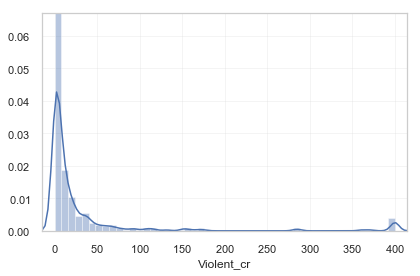

In [19]:

df_jittered2.head(10)
df_jittered2['Violent_cr'] = df.apply(lambda x: 400 if x['Violent_cr'] > 400 else x['Violent_cr'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Violent_cr"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Violent_cr"],bins=50)
df_jittered2.head(10)

# Clean property Agg_asslt variable

In [20]:
df2["Agg_asslt"].dropna().sample(90).describe()

count      90.000
mean      382.856
std      3346.628
min         0.000
25%         1.000
50%         3.000
75%        11.000
max     31767.000
Name: Agg_asslt, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


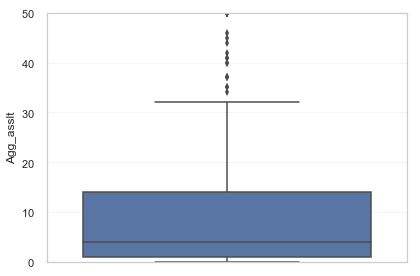

,City,Pop,Pop_squared,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr
0,Adams Village,1861,3463321,0,0,0,0,0,2,10,0,12
1,Addison Town and Village,2577,6640929,3,0,0,0,3,3,20,1,24
2,Akron Village,2846,8099716,3,0,0,0,3,1,15,0,16
3,Albany,97956,7000000000,400,8,30,227,50,705,3243,142,4090
4,Albion Village,6388,40806544,23,0,3,4,16,53,165,5,223
5,Alfred Village,4089,16719921,5,0,0,3,2,10,36,0,46
6,Allegany Village,1781,3171961,3,0,0,0,3,0,10,0,10
7,Amherst Town,100000,7000000000,107,1,7,31,50,204,1882,32,2118
8,Amityville Village,9519,90611361,9,0,2,4,3,16,188,6,210
9,Amsterdam,18182,330585124,30,0,0,12,18,99,291,15,405


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


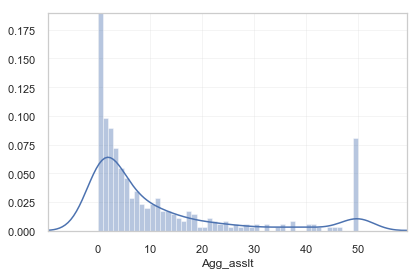

In [21]:


df_jittered2.head(10)
df_jittered2['Agg_asslt'] = df.apply(lambda x: 50 if x['Agg_asslt'] > 50 else x['Agg_asslt'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Agg_asslt"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Agg_asslt"],bins=50)
df_jittered2.head(10)

# Clean burglary variable

In [22]:
df2["Burg"].dropna().sample(90).describe()

count    90.000
mean     54.744
std     106.623
min       0.000
25%       6.000
50%      17.500
75%      52.000
max     705.000
Name: Burg, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


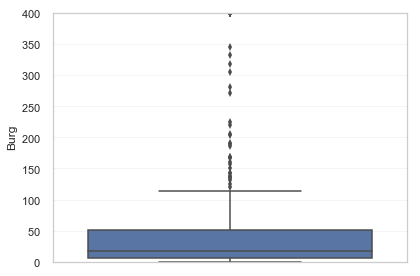

,City,Pop,Pop_squared,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr
0,Adams Village,1861,3463321,0,0,0,0,0,2,10,0,12
1,Addison Town and Village,2577,6640929,3,0,0,0,3,3,20,1,24
2,Akron Village,2846,8099716,3,0,0,0,3,1,15,0,16
3,Albany,97956,7000000000,400,8,30,227,50,400,3243,142,4090
4,Albion Village,6388,40806544,23,0,3,4,16,53,165,5,223
5,Alfred Village,4089,16719921,5,0,0,3,2,10,36,0,46
6,Allegany Village,1781,3171961,3,0,0,0,3,0,10,0,10
7,Amherst Town,100000,7000000000,107,1,7,31,50,204,1882,32,2118
8,Amityville Village,9519,90611361,9,0,2,4,3,16,188,6,210
9,Amsterdam,18182,330585124,30,0,0,12,18,99,291,15,405


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


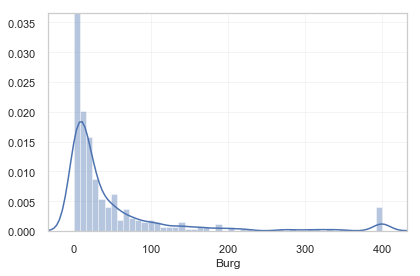

In [23]:
df_jittered2.head(10)
df_jittered2['Burg'] = df.apply(lambda x: 400 if x['Burg'] > 400 else x['Burg'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Burg"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Burg"],bins=50)
df_jittered2.head(10)

# Clean larceny and theft crime variable

In [24]:
df2["Larc_thft"].dropna().sample(90).describe()

count     90.000
mean     314.878
std      523.031
min        0.000
25%       38.250
50%      129.000
75%      337.500
max     3243.000
Name: Larc_thft, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


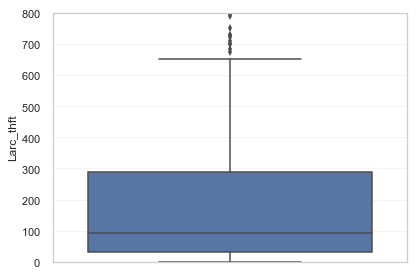

,City,Pop,Pop_squared,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr
0,Adams Village,1861,3463321,0,0,0,0,0,2,10,0,12
1,Addison Town and Village,2577,6640929,3,0,0,0,3,3,20,1,24
2,Akron Village,2846,8099716,3,0,0,0,3,1,15,0,16
3,Albany,97956,7000000000,400,8,30,227,50,400,800,142,4090
4,Albion Village,6388,40806544,23,0,3,4,16,53,165,5,223
5,Alfred Village,4089,16719921,5,0,0,3,2,10,36,0,46
6,Allegany Village,1781,3171961,3,0,0,0,3,0,10,0,10
7,Amherst Town,100000,7000000000,107,1,7,31,50,204,800,32,2118
8,Amityville Village,9519,90611361,9,0,2,4,3,16,188,6,210
9,Amsterdam,18182,330585124,30,0,0,12,18,99,291,15,405


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


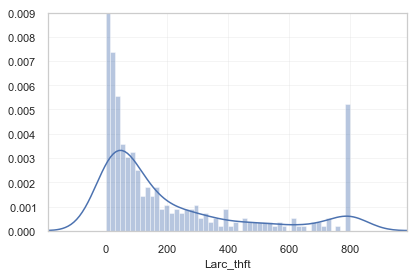

In [25]:
df_jittered2.head(10)
df_jittered2['Larc_thft'] = df.apply(lambda x: 800 if x['Larc_thft'] > 800 else x['Larc_thft'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Larc_thft"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Larc_thft"],bins=50)
df_jittered2.head(10)

# Clean motor vehicle theft crime variable

In [118]:
df2["Mtr_vhcl_thft"].dropna().sample(90).describe()

count    90.000
mean      8.378
std      20.973
min       0.000
25%       0.000
50%       1.500
75%       5.000
max     100.000
Name: Mtr_vhcl_thft, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


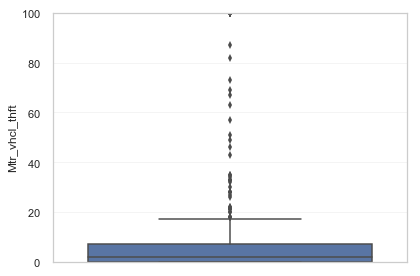

,City,Pop,Pop_squared,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr
0,Adams Village,1861,3463321,0,0,0,0,0,2,10,0,12
1,Addison Town and Village,2577,6640929,3,0,0,0,3,3,20,1,24
2,Akron Village,2846,8099716,3,0,0,0,3,1,15,0,16
3,Albany,97956,7000000000,400,8,30,227,50,400,800,100,4090
4,Albion Village,6388,40806544,23,0,3,4,16,53,165,5,223
5,Alfred Village,4089,16719921,5,0,0,3,2,10,36,0,46
6,Allegany Village,1781,3171961,3,0,0,0,3,0,10,0,10
7,Amherst Town,100000,7000000000,107,1,7,31,50,204,800,32,2118
8,Amityville Village,9519,90611361,9,0,2,4,3,16,188,6,210
9,Amsterdam,18182,330585124,30,0,0,12,18,99,291,15,405


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


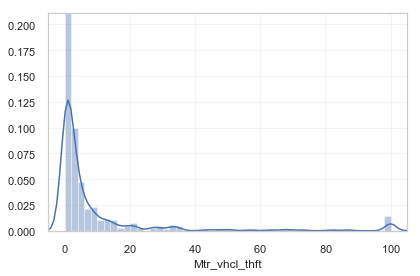

In [27]:
df_jittered2.head(10)
df_jittered2['Mtr_vhcl_thft'] = df.apply(lambda x: 100 if x['Mtr_vhcl_thft'] > 100 else x['Mtr_vhcl_thft'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Mtr_vhcl_thft"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Mtr_vhcl_thft"],bins=50)
df_jittered2.head(10)

# Clean property crime variable

In [28]:
#df_jittered2["Violent_cr"].dropna().sample(60).describe()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


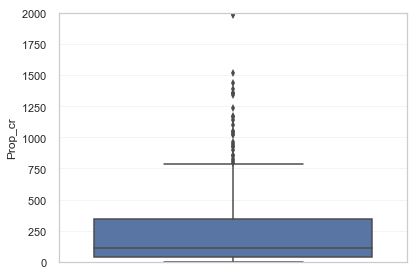

,City,Pop,Pop_squared,Violent_cr,Mrdr_manslter,Rape2,Robbery,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft,Prop_cr
0,Adams Village,1861,3463321,0,0,0,0,0,2,10,0,12
1,Addison Town and Village,2577,6640929,3,0,0,0,3,3,20,1,24
2,Akron Village,2846,8099716,3,0,0,0,3,1,15,0,16
3,Albany,97956,7000000000,400,8,30,227,50,400,800,100,2000
4,Albion Village,6388,40806544,23,0,3,4,16,53,165,5,223
5,Alfred Village,4089,16719921,5,0,0,3,2,10,36,0,46
6,Allegany Village,1781,3171961,3,0,0,0,3,0,10,0,10
7,Amherst Town,100000,7000000000,107,1,7,31,50,204,800,32,2000
8,Amityville Village,9519,90611361,9,0,2,4,3,16,188,6,210
9,Amsterdam,18182,330585124,30,0,0,12,18,99,291,15,405


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


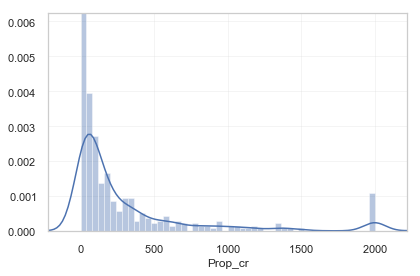

In [29]:

df_jittered2['Prop_cr'] = df.apply(lambda x: 2000 if x['Prop_cr'] > 2000 else x['Prop_cr'], axis=1)
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Prop_cr"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Prop_cr"],bins=50)
df_jittered2.head(10)


# Features

In [30]:
# Set features
features = pd.get_dummies(df_jittered2['City'])
features['Murder_feat'] = np.where(df_jittered2['Mrdr_manslter']>0, 1, 0)
features['Rape2_feat'] = np.where(df_jittered2['Rape2']>0, 1, 0)
features['Robbery_feat'] = np.where(df_jittered2['Robbery']>0, 1, 0)

print(df_jittered2['Mrdr_manslter'].groupby(features['Murder_feat']).describe())
print(df_jittered2['Rape2'].groupby(features['Rape2_feat']).describe())
print(df_jittered2['Robbery'].groupby(features['Robbery_feat']).describe())


              count   mean    std   min   25%   50%   75%     max
Murder_feat                                                      
0           299.000  0.000  0.000 0.000 0.000 0.000 0.000   0.000
1            49.000 11.122 48.098 1.000 1.000 1.000 3.000 335.000
             count   mean    std   min   25%   50%   75%      max
Rape2_feat                                                       
0          204.000  0.000  0.000 0.000 0.000 0.000 0.000    0.000
1          144.000 14.174 93.495 1.000 1.000 3.000 5.000 1112.000
               count    mean      std   min   25%   50%    75%       max
Robbery_feat                                                            
0            139.000   0.000    0.000 0.000 0.000 0.000  0.000     0.000
1            209.000 121.388 1329.475 1.000 1.000 4.000 12.000 19170.000


## DS 2_4_4 Model

 ## 𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒 = 𝛼 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛^2 + 𝑀𝑢𝑟𝑑𝑒𝑟 + 𝑅𝑜𝑏𝑏𝑒𝑟𝑦

In [31]:

#del df3

In [32]:
# Instantiate and fit our model.
df3=pd.DataFrame()

df3['Pop'] = df_jittered2['Pop']
df3['Pop2'] = df_jittered2['Pop_squared']
df3['Murder_feat'] = features['Murder_feat']
df3['Robbery_feat'] = features['Robbery_feat']
df3['Violent_cr'] = df_jittered2['Violent_cr']
df3['Agg_asslt'] = df_jittered2['Agg_asslt']
df3['Burg'] = df_jittered2['Burg']
df3['Larc_thft'] = df_jittered2['Larc_thft']
df3['Mtr_vhcl_thft'] = df_jittered2['Mtr_vhcl_thft']

df3['Prop_cr'] = df_jittered2['Prop_cr']



# Inspection

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


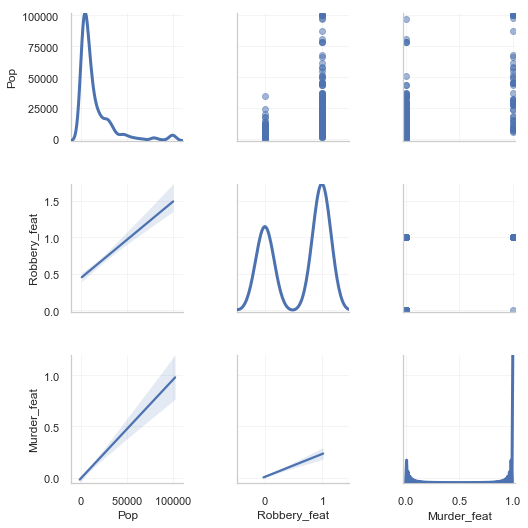

In [33]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df3[['Pop','Robbery_feat','Murder_feat']], diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [34]:
regr = linear_model.LinearRegression()
Y = df3['Prop_cr'].values.reshape(-1, 1)
#X = df3[['pop_mur_rob','pop2_mur_rob','Murder_feat','Robbery_feat']]
X = df3[['Pop','Robbery_feat','Murder_feat']]
regr.fit(X, Y)

# Inspect the results.
print(X[:5])

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

     Pop  Robbery_feat  Murder_feat
0   1861             0            0
1   2577             0            0
2   2846             0            0
3  97956             1            1
4   6388             1            0

Coefficients: 
 [[1.88987871e-02 7.21912094e+01 1.37499285e+02]]

Intercept: 
 [-38.59259336]

R-squared:
0.8245298975884883


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


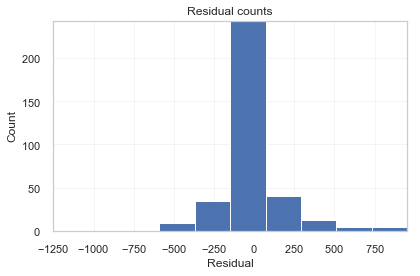

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


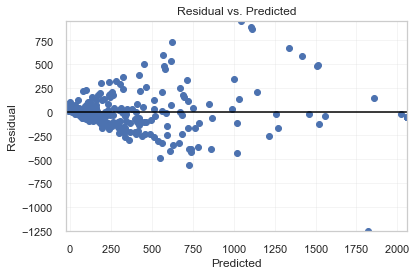

In [35]:

# Extract predicted values.
predicted = regr.predict(X).ravel()

actual = df3['Prop_cr']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks good.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#Homoscedasticity does not look good. 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [37]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Pop,Robbery_feat,Murder_feat
Pop,1.000,0.425,0.551
Robbery_feat,0.425,1.000,0.313
Murder_feat,0.551,0.313,1.000


## DS_2_5_1

# Use OLS

In [39]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Prop_cr ~ Pop+Robbery_feat+Murder_feat'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df3).fit()
lm.params
display("============\nParameters\n===============")
display(lm.params)
display("============\nValues\n===============")
display(lm.pvalues)
display("=============\nR Squared\n===============")
display(lm.rsquared)
display("=============\nConfidence Interval\n===============")
display(lm.conf_int())

'============\nParameters\n==============='

Intercept      -38.593
Pop              0.019
Robbery_feat    72.191
Murder_feat    137.499
dtype: float64

'============\nValues\n==============='

Intercept      0.023
Pop            0.000
Robbery_feat   0.003
Murder_feat    0.000
dtype: float64

'=============\nR Squared\n==============='

0.8245298975884883

'=============\nConfidence Interval\n==============='

,0,1
Intercept,-71.751,-5.434
Pop,0.018,0.020
Robbery_feat,25.382,119.000
Murder_feat,65.996,209.002


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


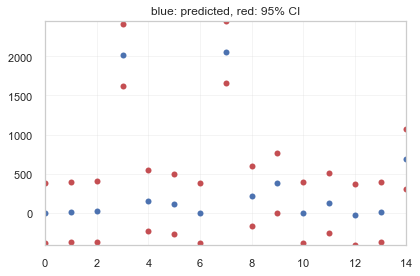

In [40]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

## DS_2_5_2

# Test Data Section

In [41]:
dftestload = pd.read_csv("crime_data_ny_2014.txt",encoding="utf-8", thousands=',', delimiter='\t')
dftest = dftestload
dftest.columns=my_cols
dftest.head()

,City,Pop,Violent_cr,Mrdr_manslter,Rape1,Rape2,Robbery,Agg_asslt,Prop_cr,Burg,Larc_thft,Mtr_vhcl_thft,Arson3
0,Adams Village,1851,0,0,nan,0.000,0,0,11.000,1,10.000,0,0.000
1,Addison Town and Village,2568,2,0,nan,0.000,1,1,49.000,1,47.000,1,0.000
2,Afton Village4,820,0,0,0.000,nan,0,0,1.000,0,1.000,0,0.000
3,Akron Village,2842,1,0,nan,0.000,0,1,17.000,0,17.000,0,0.000
4,Albany4,98595,802,8,54.000,nan,237,503,3888.000,683,3083.000,122,12.000


In [42]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 13 columns):
City             369 non-null object
Pop              369 non-null int64
Violent_cr       369 non-null int64
Mrdr_manslter    369 non-null int64
Rape1            227 non-null float64
Rape2            142 non-null float64
Robbery          369 non-null int64
Agg_asslt        369 non-null int64
Prop_cr          368 non-null float64
Burg             369 non-null int64
Larc_thft        368 non-null float64
Mtr_vhcl_thft    369 non-null int64
Arson3           365 non-null float64
dtypes: float64(5), int64(7), object(1)
memory usage: 37.6+ KB


In [43]:
dftest.replace('', np.nan, inplace=True)
dftest.isnull().sum()
dftest.fillna(0,inplace=True)
dftest.isnull().sum()
dftest = dftest.astype({            
                'City':'object',
                'Pop':'int64',
                'Violent_cr':'int64',
                'Mrdr_manslter':'int64',
                'Rape1':'int64',
                'Rape2':'int64',
                'Robbery':'int64',
                'Agg_asslt':'int64',
                'Prop_cr':'int64',
                'Burg':'int64',
                'Larc_thft':'int64',
                'Mtr_vhcl_thft':'int64',
                'Arson3':'int64'
                })
dftest["Pop_squared"] = np.square(dftest["Pop"])
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
City             369 non-null object
Pop              369 non-null int64
Violent_cr       369 non-null int64
Mrdr_manslter    369 non-null int64
Rape1            369 non-null int64
Rape2            369 non-null int64
Robbery          369 non-null int64
Agg_asslt        369 non-null int64
Prop_cr          369 non-null int64
Burg             369 non-null int64
Larc_thft        369 non-null int64
Mtr_vhcl_thft    369 non-null int64
Arson3           369 non-null int64
Pop_squared      369 non-null int64
dtypes: int64(13), object(1)
memory usage: 40.4+ KB


In [77]:
dftest[(dftest.isna() == True)].count()

City             0
Pop              0
Violent_cr       0
Mrdr_manslter    0
Rape1            0
Rape2            0
Robbery          0
Agg_asslt        0
Prop_cr          0
Burg             0
Larc_thft        0
Mtr_vhcl_thft    0
Arson3           0
Pop_squared      0
dtype: int64

In [44]:
dftest.describe()

,Pop,Violent_cr,Mrdr_manslter,Rape1,Rape2,Robbery,Agg_asslt,Prop_cr,Burg,Larc_thft,Mtr_vhcl_thft,Arson3,Pop_squared
count,369.000,369.000,369.000,369.000,369.000,369.000,369.000,369.000,369.000,369.000,369.000,369.000,369.000
mean,37814.824,183.691,1.453,9.569,0.003,60.661,112.005,696.469,100.900,561.266,34.317,1.409,195523845923.664
std,441159.058,2638.842,17.694,114.870,0.052,866.481,1640.515,7114.021,855.103,5861.943,406.957,7.953,3738110713430.990
min,79.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6241.000
25%,2631.000,1.000,0.000,0.000,0.000,0.000,0.000,25.000,4.000,20.000,0.000,0.000,6922161.000
50%,6581.000,5.000,0.000,0.000,0.000,1.000,3.000,75.000,12.000,60.000,2.000,0.000,43309561.000
75%,15408.000,18.000,0.000,2.000,0.000,4.000,12.000,270.000,39.000,228.000,6.000,1.000,237406464.000
max,8473938.000,50564.000,333.000,2190.000,1.000,16581.000,31460.000,135747.000,15916.000,112107.000,7724.000,135.000,71807625227844.000


In [45]:
print("Percent of Zeros\n================================")
print("Violent_cr {:0.2f}".format(dftest[(dftest['Violent_cr']==0)].shape[0]/dftest.shape[0]))
print("Mrdr_manslter {:0.2f}".format(dftest[(dftest['Mrdr_manslter']==0)].shape[0]/dftest.shape[0]))
print("Rape2 {:0.2f}".format(dftest[(dftest['Rape2']==0)].shape[0]/dftest.shape[0]))
print("Robbery {:0.2f}".format(dftest[(dftest['Robbery']==0)].shape[0]/dftest.shape[0]))
print("Agg_asslt {:0.2f}".format(dftest[(dftest['Agg_asslt']==0)].shape[0]/dftest.shape[0]))
print("Prop_cr {:0.2f}".format(dftest[(dftest['Prop_cr']==0)].shape[0]/dftest.shape[0]))
print("Burg {:0.2f}".format(dftest[(dftest['Burg']==0)].shape[0]/dftest.shape[0]))
print("Larc_thft {:0.2f}".format(dftest[(dftest['Larc_thft']==0)].shape[0]/dftest.shape[0]))
print("Mtr_vhcl_thft {:0.2f}".format(dftest[(dftest['Mtr_vhcl_thft']==0)].shape[0]/dftest.shape[0]))
print("Arson3 {:0.2f}".format(dftest[(dftest['Arson3']==0)].shape[0]/dftest.shape[0]))

Percent of Zeros
Violent_cr 0.20
Mrdr_manslter 0.86
Rape2 1.00
Robbery 0.47
Agg_asslt 0.26
Prop_cr 0.02
Burg 0.10
Larc_thft 0.03
Mtr_vhcl_thft 0.30
Arson3 0.72


# Features for Test

In [119]:
dftest2 = dftest.loc[((dftest["City"] != "")), [
                                    "City",
                                    "Pop",
                                    "Pop_squared",   
                                    "Violent_cr",
                                    "Mrdr_manslter",
                                    "Rape2", 
                                    "Robbery",
                                    "Agg_asslt",
                                    "Burg",
                                    "Larc_thft",
                                    "Mtr_vhcl_thft", 
                                    "Prop_cr"
                                    ]]
df_jittered2test = dftest2
df_jittered2test.shape[0]


369

In [99]:
# Set features
featurestest = pd.get_dummies(df_jittered2test['City'])
featurestest['Murder_feat'] = np.where(df_jittered2test['Mrdr_manslter']>0, 1, 0)
# No such feature here: featurestest['Rape2_feat'] = np.where(df_jittered2test['Rape2']>0, 1, 0)
featurestest['Robbery_feat'] = np.where(df_jittered2test['Robbery']>0, 1, 0)

print(df_jittered2test['Mrdr_manslter'].groupby(featurestest['Murder_feat']).describe())
#print(df_jittered2test['Rape2'].groupby(featurestest['Rape2_feat']).describe())
print(df_jittered2test['Robbery'].groupby(featurestest['Robbery_feat']).describe())

              count   mean    std   min   25%   50%   75%     max
Murder_feat                                                      
0           318.000  0.000  0.000 0.000 0.000 0.000 0.000   0.000
1            51.000 10.510 46.980 1.000 1.000 1.000 3.000 333.000
               count    mean      std   min   25%   50%    75%       max
Robbery_feat                                                            
0            173.000   0.000    0.000 0.000 0.000 0.000  0.000     0.000
1            196.000 114.204 1187.741 1.000 1.750 4.000 12.250 16581.000


In [120]:

df3test = pd.DataFrame()

df3test['Pop'] = df_jittered2test['Pop']
df3test['Pop2'] = df_jittered2test['Pop_squared']
df3test['Murder_feat'] = featurestest['Murder_feat']
df3test['Robbery_feat'] = featurestest['Robbery_feat']
df3test['Violent_cr'] = df_jittered2test['Violent_cr']
df3test['Agg_asslt'] = df_jittered2test['Agg_asslt']
df3test['Burg'] = df_jittered2test['Burg']
df3test['Larc_thft'] = df_jittered2test['Larc_thft']
df3test['Mtr_vhcl_thft'] = df_jittered2test['Mtr_vhcl_thft']
df3test['Prop_cr'] = df_jittered2test['Prop_cr']
 

 ## 𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒 = 𝛼 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛^2 + 𝑀𝑢𝑟𝑑𝑒𝑟 + 𝑅𝑜𝑏𝑏𝑒𝑟𝑦

# Test with 2014 dataset

In [51]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formulatest = 'Prop_cr ~ Pop+Robbery_feat+Murder_feat'

# Fit the model to our data using the formula.
lmtest = smf.ols(formula=linear_formulatest, data=df3test).fit()
lmtest.params
display("============\nParameters\n===============")
display(lmtest.params)
display("============\nValues\n===============")
display(lmtest.pvalues)
display("=============\nR Squared\n===============")
display(lmtest.rsquared)
display("=============\nConfidence Interval\n===============")
display(lmtest.conf_int())

'============\nParameters\n==============='

Intercept      114.805
Pop              0.016
Robbery_feat   -17.769
Murder_feat    -47.343
dtype: float64

'============\nValues\n==============='

Intercept      0.033
Pop            0.000
Robbery_feat   0.807
Murder_feat    0.643
dtype: float64

'=============\nR Squared\n==============='

0.9926993798799216

'=============\nConfidence Interval\n==============='

,0,1
Intercept,9.356,220.254
Pop,0.016,0.016
Robbery_feat,-160.521,124.983
Murder_feat,-247.976,153.290


# Iterate with hodlout

In [159]:

regr = linear_model.LinearRegression()

Y2 = df3['Prop_cr'].values.reshape(-1, 1)
X2 = df3[['Pop','Robbery_feat','Murder_feat']]
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=20)
clf = regr.fit(X_train, y_train)

Ytest = df3test['Prop_cr'].values.reshape(-1, 1)
Xtest = df3test[['Pop','Robbery_feat','Murder_feat']]

Xtest.head()
#Xtest[(Xtest.isnull() == True)].count()

,Pop,Robbery_feat,Murder_feat
0,1851,0,0
1,2568,1,0
2,820,0,0
3,2842,0,0
4,98595,1,1


In [160]:
Ytest[0:5]

array([[  11],
       [  49],
       [   1],
       [  17],
       [3888]], dtype=int64)

In [162]:
clf.predict(Xtest)

# Inspect the results.
print(Xtest[:5])

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(Xtest, Ytest))

     Pop  Robbery_feat  Murder_feat
0   1851             0            0
1   2568             1            0
2    820             0            0
3   2842             0            0
4  98595             1            1

Coefficients: 
 [[1.87778618e-02 7.66770615e+01 1.41606802e+02]]

Intercept: 
 [-40.7928323]

R-squared:
0.9642209848066833


## DS_2_5_3 Partial Least Squares

## Fit a linear model with all 9 features.

In [124]:
regr = linear_model.LinearRegression()
Y = df3['Prop_cr'].values.reshape(-1, 1)
X = df3[['Pop','Pop2','Murder_feat','Robbery_feat','Violent_cr','Agg_asslt','Burg','Larc_thft','Mtr_vhcl_thft']]
actual = df3['Prop_cr']



In [125]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Pop,Pop2,Murder_feat,Robbery_feat,Violent_cr,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft
Pop,1.000,0.958,0.551,0.425,0.758,0.776,0.840,0.825,0.830
Pop2,0.958,1.000,0.490,0.300,0.745,0.699,0.797,0.714,0.819
Murder_feat,0.551,0.490,1.000,0.313,0.603,0.598,0.595,0.557,0.560
Robbery_feat,0.425,0.300,0.313,1.000,0.304,0.476,0.402,0.552,0.332
Violent_cr,0.758,0.745,0.603,0.304,1.000,0.783,0.913,0.689,0.933
Agg_asslt,0.776,0.699,0.598,0.476,0.783,1.000,0.835,0.850,0.757
Burg,0.840,0.797,0.595,0.402,0.913,0.835,1.000,0.839,0.917
Larc_thft,0.825,0.714,0.557,0.552,0.689,0.850,0.839,1.000,0.745
Mtr_vhcl_thft,0.830,0.819,0.560,0.332,0.933,0.757,0.917,0.745,1.000


In [238]:
# Fit a linear model with all 9 features.
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Save predicted values.
Y_pred = regr.predict(X)


# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, Y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)






In [239]:
# Concat dataframe for sns scatter plot.
reg_regr = np.chararray((348, 1),itemsize=3,unicode=True)
reg_regr[:] = "reg"
reg_pls = np.chararray((348, 1),itemsize=3,unicode=True)
reg_pls[:] = "pls"

actual2 = np.array(df3['Prop_cr'])
actual2.reshape(-1,1)

df5_1 = pd.DataFrame(Y_pred.reshape(-1,1))
df5_2 = pd.DataFrame(actual2)
df5_3 = pd.DataFrame(reg_regr)

df5_1.columns=['Ypred']
df5_2.columns=['Actual']
df5_3.columns=['Type']
frames = (df5_1,df5_2,df5_3)
df5 = pd.concat(frames,axis=1)

df6_1 = pd.DataFrame(Y_PLS_pred.reshape(-1,1))
df6_2 = pd.DataFrame(actual2)
df6_3 = pd.DataFrame(reg_pls)

df6_1.columns=['Ypred']
df6_2.columns=['Actual']
df6_3.columns=['Type']
frames = (df6_1,df6_2,df6_3)
df6 = pd.concat(frames,axis=1)

frames = (df5,df6)
df7 = pd.concat(frames,axis=0)


Regular Reg Coefficients: 
 [[-4.97050524e-03  1.27330546e-07 -9.38729868e+00 -6.19253397e+00
  -3.00669291e-01 -1.55827269e+00  2.37966432e+00  9.80994472e-01
   1.17134913e+00]]

Regular Intercept: 
 [10.98388395]

Regular R-squared:
0.9770730378947263

PLS Reg Coefficients: 
 [[ 44.79794285]
 [ 54.28522532]
 [ -8.87861852]
 [-18.58613954]
 [-15.20014884]
 [ 12.02753464]
 [146.20080227]
 [226.67274709]
 [ 36.33631296]]

PLS R-squared:
0.9703075394358499


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


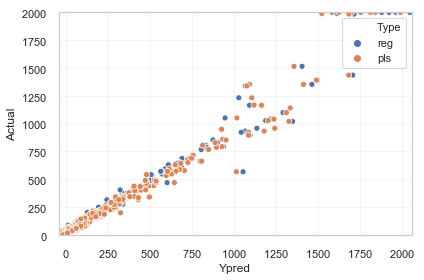

In [250]:
# Inspect the results.
#print(X[:5])

print('\nRegular Reg Coefficients: \n', regr.coef_)
print('\nRegular Intercept: \n', regr.intercept_)
print('\nRegular R-squared:')
print(regr.score(X, Y))

print('\nPLS Reg Coefficients: \n', pls1.coef_)
print('\nPLS R-squared:')
print(pls1.score(X, Y))

# Compare the predictions of the two models
ax = sns.scatterplot(x="Ypred", y="Actual",
                        hue="Type",
                      data=df7)
sns.color_palette("cubehelix", 8)
plt.show()

## Fit a linear model with 7 features.

In [251]:
regr = linear_model.LinearRegression()
Y = df3['Prop_cr'].values.reshape(-1, 1)
X = df3[['Pop','Pop2','Violent_cr','Agg_asslt','Burg','Larc_thft','Mtr_vhcl_thft']]
actual = df3['Prop_cr']



In [252]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Pop,Pop2,Violent_cr,Agg_asslt,Burg,Larc_thft,Mtr_vhcl_thft
Pop,1.000,0.958,0.758,0.776,0.840,0.825,0.830
Pop2,0.958,1.000,0.745,0.699,0.797,0.714,0.819
Violent_cr,0.758,0.745,1.000,0.783,0.913,0.689,0.933
Agg_asslt,0.776,0.699,0.783,1.000,0.835,0.850,0.757
Burg,0.840,0.797,0.913,0.835,1.000,0.839,0.917
Larc_thft,0.825,0.714,0.689,0.850,0.839,1.000,0.745
Mtr_vhcl_thft,0.830,0.819,0.933,0.757,0.917,0.745,1.000


In [253]:
# Fit a linear model with all 9 features.
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Save predicted values.
Y_pred = regr.predict(X)


# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, Y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)






In [254]:
# Concat dataframe for sns scatter plot.
reg_regr = np.chararray((348, 1),itemsize=3,unicode=True)
reg_regr[:] = "reg"
reg_pls = np.chararray((348, 1),itemsize=3,unicode=True)
reg_pls[:] = "pls"

actual2 = np.array(df3['Prop_cr'])
actual2.reshape(-1,1)

df5_1 = pd.DataFrame(Y_pred.reshape(-1,1))
df5_2 = pd.DataFrame(actual2)
df5_3 = pd.DataFrame(reg_regr)

df5_1.columns=['Ypred']
df5_2.columns=['Actual']
df5_3.columns=['Type']
frames = (df5_1,df5_2,df5_3)
df5 = pd.concat(frames,axis=1)

df6_1 = pd.DataFrame(Y_PLS_pred.reshape(-1,1))
df6_2 = pd.DataFrame(actual2)
df6_3 = pd.DataFrame(reg_pls)

df6_1.columns=['Ypred']
df6_2.columns=['Actual']
df6_3.columns=['Type']
frames = (df6_1,df6_2,df6_3)
df6 = pd.concat(frames,axis=1)

frames = (df5,df6)
df7 = pd.concat(frames,axis=0)


Regular Reg Coefficients: 
 [[-5.19361182e-03  1.30002746e-07 -3.20877081e-01 -1.62223120e+00
   2.38472227e+00  9.75080168e-01  1.20810076e+00]]

Regular Intercept: 
 [9.79304038]

Regular R-squared:
0.9770169593103725

PLS Reg Coefficients: 
 [[ 33.68648449]
 [ 63.14491159]
 [-13.58445216]
 [-39.08802845]
 [168.62110536]
 [224.10202969]
 [ 51.05030564]]

PLS R-squared:
0.9722745669114731


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


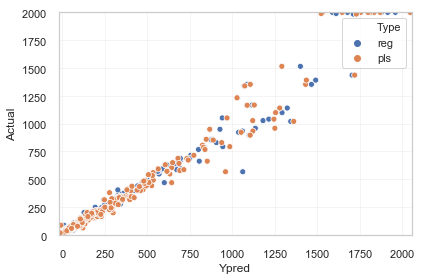

In [255]:
# Inspect the results.
#print(X[:5])

print('\nRegular Reg Coefficients: \n', regr.coef_)
print('\nRegular Intercept: \n', regr.intercept_)
print('\nRegular R-squared:')
print(regr.score(X, Y))

print('\nPLS Reg Coefficients: \n', pls1.coef_)
print('\nPLS R-squared:')
print(pls1.score(X, Y))

# Compare the predictions of the two models
ax = sns.scatterplot(x="Ypred", y="Actual",
                        hue="Type",
                      data=df7)
sns.color_palette("cubehelix", 8)
plt.show()

## DS_2_5_4 Gradient Descent Algorithm


Coefficients from sklearn: 
 [[1.98641562]]

Intercept from sklearn: 
 [0.50492022]

====done iterating======
Error difference: 0.000975
Iterations: 190
====done======

Coefficients from gradient descent algorithm: 
 1.8348761229494017

Intercept from gradient descent algorithm: 
 0.4139080385269684


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


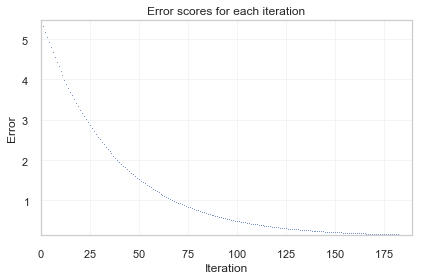

In [283]:
## Cost function for the linear regression that we will try to optimize.
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data.
    
    Alpha and beta are the coeficients that describe the fit line line, while
    x and y are lists or arrays with the x and y value of each data point.
    '''
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2
        error += point_error
    return error / n


# Function we'll call each iteration (or step) of the gradient algorithm.
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one.'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        # Partial derivative of the intercept.
        point_alpha = -(2 / n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # Partial derivative of the slope.
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha 
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

# These constants correspond to the decision-points described above.
# How many steps to take.
stop = 1000

# How far to move with each step.
learning_rate = .005

# Starting values for intercept and slope 
alpha_start = 0
beta_start = 0



# Time to make some data!
x = np.random.normal(0, 1, 100)
y = x * 2 + np.random.sample(100)

# Fit an true minimum regression using solved equations.
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)


# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.

# Storing each iteration to inspect later.
all_error=[]

# Provide starting values.
alpha = alpha_start
beta = beta_start

#Run the algorithm.
for iter in range(stop):
    
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error.
    error = LR_cost_function(alpha, beta, x, y)
    if len(all_error) > 0:
        if all_error[iter-1] - error < 0.001:
            print("\n====done iterating======")
            print("Error difference: {:0.6f}".format(all_error[iter-1] - error))
            print("Iterations: {:0}".format(iter))
            print("====done======")
            break
    # Store the error to instpect later.
    all_error.append(error)

    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error, 'o', ms=.8)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()

## END